<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-нудевые-значения-в-целевом-признаке" data-toc-modified-id="Проверим-нудевые-значения-в-целевом-признаке-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим нудевые значения в целевом признаке</a></span></li><li><span><a href="#Проверим-корреляцию-между-признаками" data-toc-modified-id="Проверим-корреляцию-между-признаками-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим корреляцию между признаками</a></span></li><li><span><a href="#Изучим-гистограммы-по-столбцу-product." data-toc-modified-id="Изучим-гистограммы-по-столбцу-product.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучим гистограммы по столбцу product.</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных-на-обучающую-и-валидационную-выборки" data-toc-modified-id="Разбиение-данных-на-обучающую-и-валидационную-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбиение данных на обучающую и валидационную выборки</a></span></li><li><span><a href="#Обучение-модели,-предсказывание-на-валидационной-выборке" data-toc-modified-id="Обучение-модели,-предсказывание-на-валидационной-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели, предсказывание на валидационной выборке</a></span></li><li><span><a href="#Средний-запас-предсказанного-сырья-и-RMSE-модели" data-toc-modified-id="Средний-запас-предсказанного-сырья-и-RMSE-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Средний запас предсказанного сырья и RMSE модели</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Второй регион</a></span></li><li><span><a href="#Третий-регион" data-toc-modified-id="Третий-регион-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Третий регион</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Мы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Загрузите и подготовьте данные. Поясните порядок действий.


Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

Импорт данных   
Загрузим каждый регион в отдельный датафрейм.

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
display(df1.shape)
display(df1.info())
display(df1.head())
display(df1.describe())

(100000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [3]:
df2 = pd.read_csv('/datasets/geo_data_1.csv')
display(df2.shape)
display(df2.info())
display(df2.head())
display(df2.describe())

(100000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [4]:
df3 = pd.read_csv('/datasets/geo_data_2.csv')
display(df3.shape)
display(df3.info())
display(df3.head())
display(df3.describe())

(100000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


В данных отсутсвуют пропуски. То есть у нас имеется 3 датафрейма с 5ю колонками по 100к значений.

Удалим из каждого датафрейма столбец id, так как он не используется в модели.

In [5]:
df1 = df1.drop('id', axis=1)
df2 = df2.drop('id', axis=1)
df3 = df3.drop('id', axis=1)

### Проверим нудевые значения в целевом признаке

In [6]:
def check_zeros(df, target_name):
    zeros = df[df[target_name] == 0][target_name].count()
    percent = zeros / df.shape[0]
    print('Количество нулевых значений -', zeros)
    print('Процент нулевых значений -', percent)

In [7]:
check_zeros(df1, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [8]:
check_zeros(df2, 'product')

Количество нулевых значений - 8235
Процент нулевых значений - 0.08235


In [9]:
check_zeros(df3, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


В 1 и 3 датафрейме всего одно нулевое значение, однако во втором датафрейме нулей больше 8к. На это стоит обратить внимание.  
Тоже самое говорят и средние значения по столбцу product. Однако процент маленький, нужно смотреть дальше.

### Проверим корреляцию между признаками

In [10]:
print('1 регион')
display(df1.corr())
print('2 регион')
display(df2.corr())
print('3 регион')
display(df3.corr())

1 регион


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


2 регион


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


3 регион


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


В 1 регионе признаки f0 и f1 отрицательно коррелируют относительно друг друга и f2 положительно коррелирует с целевым признаком.  
Во 2 регионе очень сильно коррелирует целевой признак и f2.  
В 3 регионе также есть положительно коррелирующие признаки, такие как f2 и product.

### Изучим гистограммы по столбцу product.

In [11]:
def oil_hist(targ, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(targ, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объём запасов в скважине, тыс. баррелей")
    plt.ylabel("Количество скважин") #не оч верно, так как некоторые повторяются, но опустим. мь лучше написать точек?...

    plt.title("Гистограмма распределения по объему запасов скважин")
    plt.show()

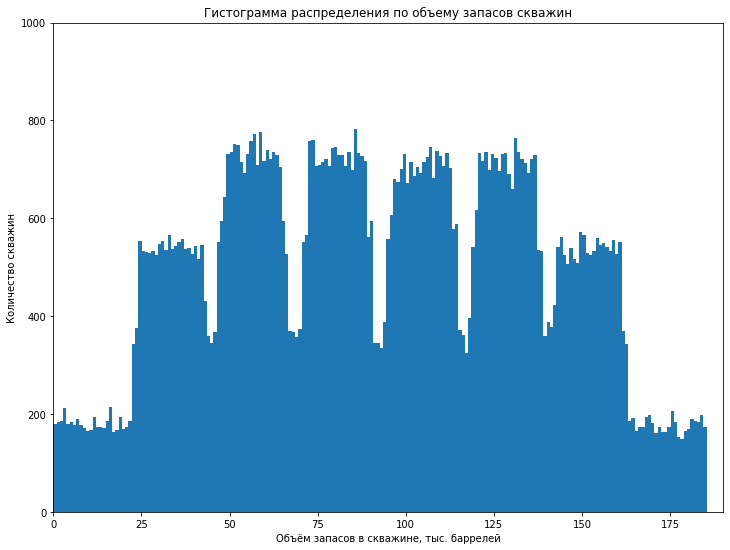

In [12]:
oil_hist(df1['product'], 200, 190, 1000)

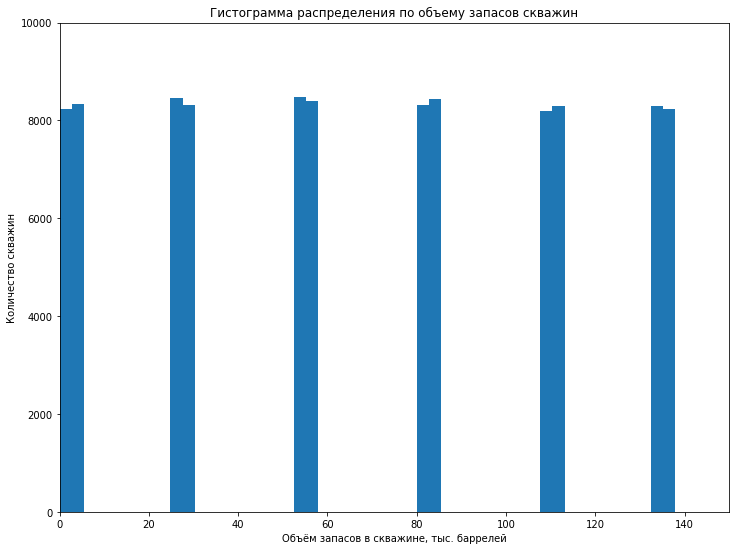

In [13]:
oil_hist(df2['product'], 50, 150, 10000)

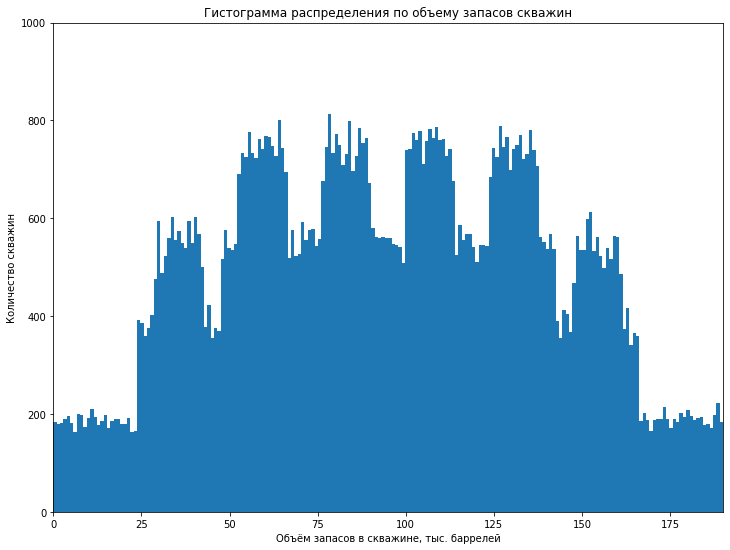

In [14]:
oil_hist(df3['product'], 200, 190, 1000)

Вообще судя по гистограмамм во 2 ДФ очень специфичные определенные значения, что по мне так странно. Но, что имеем.

# Вывод:

Признаки для модели:

* f0;
* f1;
* f2.

Целевой признак:
* product.

Данные готовы к обучению.

По гистограммам можно понять, что у первого и третьего региона наспределение скважин близкое к нормальному. Во втором регионе данные имеют странное распределение: все значения равномерно распределены по группам с шагом 15-20 баррелей, поэтому возможно, что данные были введены искуственно (или смоделированы).

<div class="alert alert-block alert-info">
Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
    
</div>


## Обучение и проверка модели

### Разбиение данных на обучающую и валидационную выборки 

Существующие данные мы делим на две выборки:

* обучающая 75% 
* валидационная 25% 

Поделим на features (признаки) и target (целевой признак) с помощью функции:

In [15]:
def test_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

In [16]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(df1, 'product')
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(df2, 'product')
features_train_3, features_valid_3, target_train_3, target_valid_3 = test_split(df3, 'product')

display(features_train_1.shape)
display(features_train_2.shape)
display(features_train_3.shape)
print('Размер обучающей выборки', features_train_1.shape[0])
print('Размер тестовой выборки', features_valid_1.shape[0])

(75000, 3)

(75000, 3)

(75000, 3)

Размер обучающей выборки 75000
Размер тестовой выборки 25000


### Обучение модели, предсказывание на валидационной выборке

2.2. Обучите модель и сделайте предсказания на валидационной выборке.  
2.3. Сохраните предсказания и правильные ответы на валидационной выборке.  
2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.  
2.5. Проанализируйте результаты.

In [17]:
from sklearn.metrics import r2_score

model = LinearRegression()

def region_prediction(reg, f_train,f_valid, t_train, t_valid):
    
    model.fit(f_train, t_train)
    predicted_valid = model.predict(f_valid)
    
    rmse = mean_squared_error(t_valid, predicted_valid)**0.5
    rmse_const = mean_squared_error(t_valid, pd.Series(t_train.mean(), t_valid.index))**0.5
    
    stock_mean_pred = predicted_valid.mean()
   
    print('RMSE:', rmse)
    print('rmse_mean:',  rmse_const)
    print('R2:',  r2_score(t_valid, predicted_valid))
    print('Средний запас предсказанного сырья:', stock_mean_pred)
    return predicted_valid, stock_mean_pred
    

### Средний запас предсказанного сырья и RMSE модели

#### Первый регион

In [18]:
predicted_valid_1, stock_mean_pred_1 = region_prediction(df1, features_train_1, features_valid_1, \
                                                          target_train_1, target_valid_1)

RMSE: 37.5794217150813
rmse_mean: 44.289591053907365
R2: 0.27994321524487786
Средний запас предсказанного сырья: 92.59256778438035


#### Второй регион

In [19]:
predicted_valid_2, stock_mean_pred_2 = region_prediction(df2, features_train_2, features_valid_2, \
                                                          target_train_2, target_valid_2)

RMSE: 0.893099286775617
rmse_mean: 46.02144533725462
R2: 0.9996233978805127
Средний запас предсказанного сырья: 68.728546895446


#### Третий регион

In [20]:
predicted_valid_3, stock_mean_pred_3 = region_prediction(df2, features_train_3, features_valid_3, \
                                                          target_train_3, target_valid_3)

RMSE: 40.02970873393434
rmse_mean: 44.90234968510566
R2: 0.20524758386040443
Средний запас предсказанного сырья: 94.96504596800489


# Вывод:

Проведя обучение на наших моделях, наилучший результат показали данные второго региона.  
Данные 1-го и 3-го региона ~ одинаковы.

Средне квадратичная ошибка у 1 и 3 примерно одинакова - около 40. У 2-го - около 1, при этом пкоэфициент детерминации почти 1! модель предсказала почти идеально!

## Подготовка к расчёту прибыли

Запишем данные из условия:

In [21]:
budget = 10_000_000_000
price_for_1000_barrel = 450000
min_barrel_for_mining = budget / price_for_1000_barrel / 200 #200 - лучшх точек
print('Достаточный объем добычи для безубыточной разработки =', round(min_barrel_for_mining, 2))

Достаточный объем добычи для безубыточной разработки = 111.11


In [22]:
print('Средний запас нефти на скважину в регионе 1', df1['product'].mean())
print('Средний запас нефти на скважину в регионе 2', df2['product'].mean())
print('Средний запас нефти на скважину в регионе 3', df3['product'].mean())

Средний запас нефти на скважину в регионе 1 92.50000000000001
Средний запас нефти на скважину в регионе 2 68.82500000000002
Средний запас нефти на скважину в регионе 3 95.00000000000004


In [23]:
def volume_(df):
    difference = df['product'].mean() - min_barrel_for_mining
    if difference >= 0:
        print('достаточный объём сырья для безубыточной разработки новой скважины. Запас равен:', difference, 'тыс.баррелей')
    else:
        print('Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо:', math.ceil(abs(difference)),
              'тыс. баррелей. Средний убыток c одной скважины составит:', math.ceil(abs(difference)) * price_for_1000_barrel,
             'рублей')

In [24]:
volume_(df1)

Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо: 19 тыс. баррелей. Средний убыток c одной скважины составит: 8550000 рублей


In [25]:
volume_(df2)

Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо: 43 тыс. баррелей. Средний убыток c одной скважины составит: 19350000 рублей


In [26]:
volume_(df3)

Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо: 17 тыс. баррелей. Средний убыток c одной скважины составит: 7650000 рублей


Перейдем к расчёту прибыли по лучшим скважинам, предсказанные моделью.

## Расчёт прибыли и рисков 

In [27]:
def revenue(target, predicted):
    predicted_sorted = predicted.sort_values(ascending=False)
    best = target.loc[predicted_sorted.index.to_list()][:200]
    return (best.sum() * price_for_1000_barrel) - budget

def bootstrap(target_valid, predict, region):
    state = np.random.RandomState(12345)
    values = []
    target = target_valid.reset_index(drop=True)
    predictions = pd.Series(predict)
    count = 0 
    for i in range(1000):
 
        target_subsample = target.sample(500, replace=True, random_state=state)
        predictions_subsample = predictions.loc[target_subsample.index.to_list()]
        value = revenue(target_subsample, predictions_subsample)
        values.append(value)
        
        if value < 0: 
            count += 1 
        
    risk = count / 1000
 
    values = pd.Series(values)
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975) 
    
    print('Средняя прибыль по', region, 'региону составляет:', round(values.mean(), 2), 'с риском в', 
          round(risk * 100, 2), '%')
    print('Доверительный интервал в регионе составляет от', round(lower, 2),'до', round(upper, 2))

<div class="alert alert-block alert-info">
    
<b>Совет:</b> риски также можно считать лаконично следующим образом: `(value < 0).mean()`
  
</div>
 
 

In [28]:
bootstrap(target_valid_1, predicted_valid_1, 1)

Средняя прибыль по 1 региону составляет: 425938526.91 с риском в 6.0 %
Доверительный интервал в регионе составляет от -102090094.84 до 947976353.36


In [29]:
bootstrap(target_valid_2, predicted_valid_2, 2)

Средняя прибыль по 2 региону составляет: 515222773.44 с риском в 1.0 %
Доверительный интервал в регионе составляет от 68873225.37 до 931547591.26


In [30]:
bootstrap(target_valid_3, predicted_valid_3, 3)

Средняя прибыль по 3 региону составляет: 435008362.78 с риском в 6.4 %
Доверительный интервал в регионе составляет от -128880547.33 до 969706954.18


# Вывод:
По результатам подсчета: не стоит исследовать 1 и 3 регион, так как риски относительно высоки.  
Лучшим вариантом остается 2 регион с риском менее 2.5%! Более того в доверительный интервал входят только положительные числа, таким образом добыча в этом регионе так или иначе окупится.

## Итоговый вывод
Было выполнено:  

* Изучили и предобработали данные. 

* Разбили данные на тренировочную и валидационную  выборки.

* Обучили модель для каждого региона. Проверили модели на данных .

* Подготовили данные к расчету прибыли.

* Посчитали прибыль, итервал и риски.


Проведя анализ между 3-м регионами можно сделать вывод, что 2-й регион самый удачный для разработки скважин (хотя данные не выглядят нормально распределенными), т.к. наша модель показала самую маленькую среднеквадратичную ошибку и самый большой коэфициент детерминации в данном регионе, что понижает ошибку выбора скважин по сравнению с другими регионами, а так же данный регион имеет самый низкий % риска, среднюю прибыль по региону и положительный доверительный интервал, который оставит нас в плюсе при любом раскладе.

Вероятнее всего такой результат получился благодаря почти 100%-ой корреляции признака f2 и целевого признака для 2 региона:)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован